## Edge Detection: Sobel operator

In [1]:
from imagetitan.image_utils import open_image, correlate_kernel, normalise
import cv2 as cv2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['image.cmap'] = 'gray'

#### This tutorial is going to focus on edge detection using gradients

In the following slides we will observe how to find edges of an image using gradients.
The gradients for this tutorial are found by convolving an image with a sobel operator. Consider the following image:

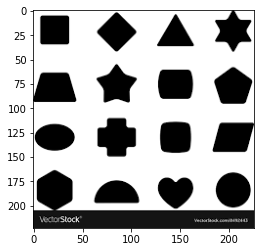

In [2]:
shapes = open_image('../images/basic_shapes.png')
shapes = normalise(shapes)
plt.imshow(shapes)

Given below is the sobel operator. As you can see it is quite symmetric along the middle column(vertically) the only difference is the sign. That is to signify that when we find derivatives we want to consider both, the left and the right derivative and consider the the average of the two to a gradient that defines an edge:

In [3]:
vertical_sobel = np.zeros((3,3))
vertical_sobel[1,0] = -2
vertical_sobel[0,0] = -1
vertical_sobel[2,0] = -1
vertical_sobel[0,2] = 1
vertical_sobel[2,2] = 1
vertical_sobel[1,2] = 2
print(vertical_sobel)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


FYI, The division by 8 is to normalize the kernel since the image has been previously normalized.
From the image given below you can observe that, the kernel that looks for gradients going from left to right performs well when trying to find vertical gradients and edges but doesn't do very well for horizontal lines. Pay close attention to the quadrilaterals.

k_span is  1
image height is: 223 & image with is: 226


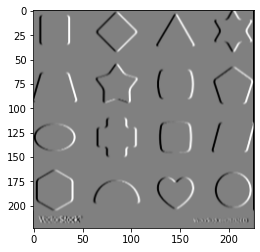

In [4]:
Gradient_X = correlate_kernel(shapes,vertical_sobel/8)
plt.imshow(Gradient_X)

What if we transpose the sobel operator?

In [7]:
horizontal_sobel = vertical_sobel.T
print(horizontal_sobel)

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


Since the operator is now looking for gradients top- bottom, It is good at detecting the horizontal edges but suffers when trying to find vertical edges. Which is also not ideal since we want to detect all edges not just half of all.

k_span is  1
image height is: 223 & image with is: 226


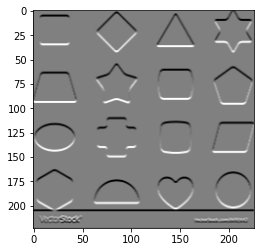

In [8]:
Gradient_Y = correlate_kernel(shapes, horizontal_sobel/8)
plt.imshow(Gradient_Y)

A standard way to normalize and add the vertical and horizontal edge images would be by calculating the euclidean norm or L2 norm as follows which clearly highlight all edges and have no biases:

mag = sqrt(gx^2 + gy^2)

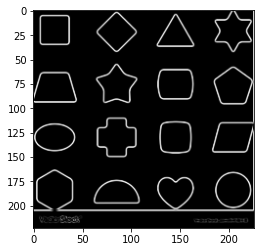

In [9]:
full_sobel = (Gradient_X**2 + Gradient_Y**2) **1/2
plt.imshow(full_sobel)

#### Gradient angles:

Consider the following diagrams:

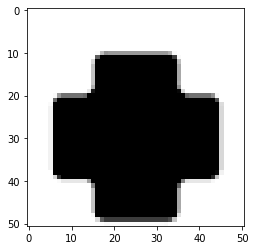

In [10]:
plt.imshow(shapes[100:151,60:111])

The Gx or gradient along X image is:

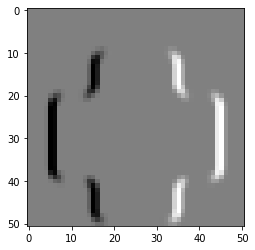

In [11]:
plt.imshow(Gradient_X[100:151,60:111])

And the Gy or gradient along Y axis image is:

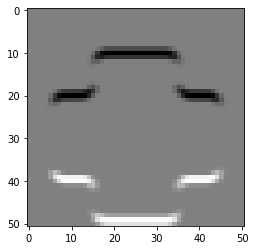

In [12]:
plt.imshow(Gradient_Y[100:151,60:111])

In [17]:
Gradient_X.max()

0.5

In [18]:
Gradient_X.min()

-0.5

Since the values of gradients are going from -0.5 to 0.5, we can get them to the 0-1 range by adding 0.5:

In [19]:
Gradient_X = Gradient_X + 0.5
Gradient_Y = Gradient_Y + 0.5

Gradient angles are calculated by tan ^-1 (inverse) (gx/gy)

In [22]:
theta = np.arctan(Gradient_X/Gradient_Y)

/tmp/ipykernel_4575/2563514189.py:1: RuntimeWarning: divide by zero encountered in true_divide
  theta = np.arctan(Gradient_X/Gradient_Y)


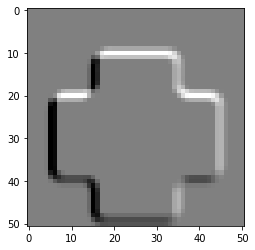

In [24]:
plt.imshow(theta[100:151,60:111])